In [5]:
pip install tensorflow

In [8]:
import numpy as np
import tensorflow as tf
import pandas as pd

In [10]:
np.random.seed(42)
tf.random.set_seed(42)

In [11]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import LSTM, Dropout
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import Dense, Activation, Dropout, RepeatVector
from tensorflow.keras.optimizers import  RMSprop
import matplotlib.pyplot as plt
import pickle
import heapq

In [12]:
path = '/Users/HP/Downloads/Next Word Prediction Dataset.txt'
txt = open(path,encoding = "UTF-8").read().lower()
print('corpus length:',len(txt))

corpus length: 581888


In [13]:
character = sorted(list(set(txt)))
char_indices = dict((c,i) for i, c in enumerate(character))
indices_char = dict((i ,c) for i, c in enumerate(character))

print(f'unique chars : {len(character)}')

unique chars : 73


In [14]:
seq_len = 40
step = 3
sentences = []
next_chars = []
for i in range(0, len(txt) - seq_len, step):
    sentences.append(txt[i: i + seq_len ])
    next_chars.append(txt[i + seq_len])
print(f'num training examples: {len(sentences)}')

num training examples: 193950


In [15]:
X = np.zeros((len(sentences), seq_len, len(character)), dtype=np.bool)
y = np.zeros((len(sentences), len(character)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        X[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

sentences[124]
next_chars[100]

C:\Users\HP\AppData\Local\Temp\ipykernel_7472\1029853919.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = np.zeros((len(sentences), seq_len, len(character)), dtype=np.bool)
C:\Users\HP\AppData\Local\Temp\ipykernel_7472\1029853919.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = np.zeros((len(sentences), len(character)), dtype=np.bool)

'e'

In [16]:
X[0][0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True])

In [17]:
y[0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [18]:
X.shape

(193950, 40, 73)

In [19]:
y.shape

(193950, 73)

In [20]:
model = Sequential()
model.add(LSTM(128,input_shape =(seq_len,len(character))))
model.add(Dense(len(character)))
model.add(Activation('softmax'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               103424    
                                                                 
 dense (Dense)               (None, 73)                9417      
                                                                 
 activation (Activation)     (None, 73)                0         
                                                                 
Total params: 112,841
Trainable params: 112,841
Non-trainable params: 0
_________________________________________________________________


In [22]:
optimizer = RMSprop(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X, y,
                    validation_split=0.01, 
                    batch_size=128,
                    epochs=7, 
                    shuffle=True).history

Epoch 1/7
1501/1501 [==============================] - 119s 78ms/step - loss: 2.0388 - accuracy: 0.4042 - val_loss: 2.2183 - val_accuracy: 0.3861
Epoch 2/7
1501/1501 [==============================] - 114s 76ms/step - loss: 1.6685 - accuracy: 0.5004 - val_loss: 2.0050 - val_accuracy: 0.4273
Epoch 3/7
1501/1501 [==============================] - 116s 77ms/step - loss: 1.5473 - accuracy: 0.5339 - val_loss: 1.9828 - val_accuracy: 0.4330
Epoch 4/7
1501/1501 [==============================] - 115s 77ms/step - loss: 1.4839 - accuracy: 0.5506 - val_loss: 1.9249 - val_accuracy: 0.4562
Epoch 5/7
1501/1501 [==============================] - 117s 78ms/step - loss: 1.4407 - accuracy: 0.5619 - val_loss: 1.9418 - val_accuracy: 0.4541
Epoch 6/7
1501/1501 [==============================] - 116s 77ms/step - loss: 1.4109 - accuracy: 0.5687 - val_loss: 1.9442 - val_accuracy: 0.4562
Epoch 7/7
1501/1501 [==============================] - 117s 78ms/step - loss: 1.3890 - accuracy: 0.5760 - val_loss: 1.9063 -

In [23]:
model.save('NW_keras_model.h5')
pickle.dump(history,open("history.p","wb"))

In [24]:
model = load_model('NW_keras_model.h5')
history = pickle.load(open("history.p","rb"))

In [25]:
loss_and_acc=model.evaluate(X,y)
print("Test Loss", loss_and_acc[0])
print("Test Accuracy", loss_and_acc[1])

6061/6061 [==============================] - 74s 12ms/step - loss: 1.3472 - accuracy: 0.5855
Test Loss 1.3472257852554321
Test Accuracy 0.5855323672294617


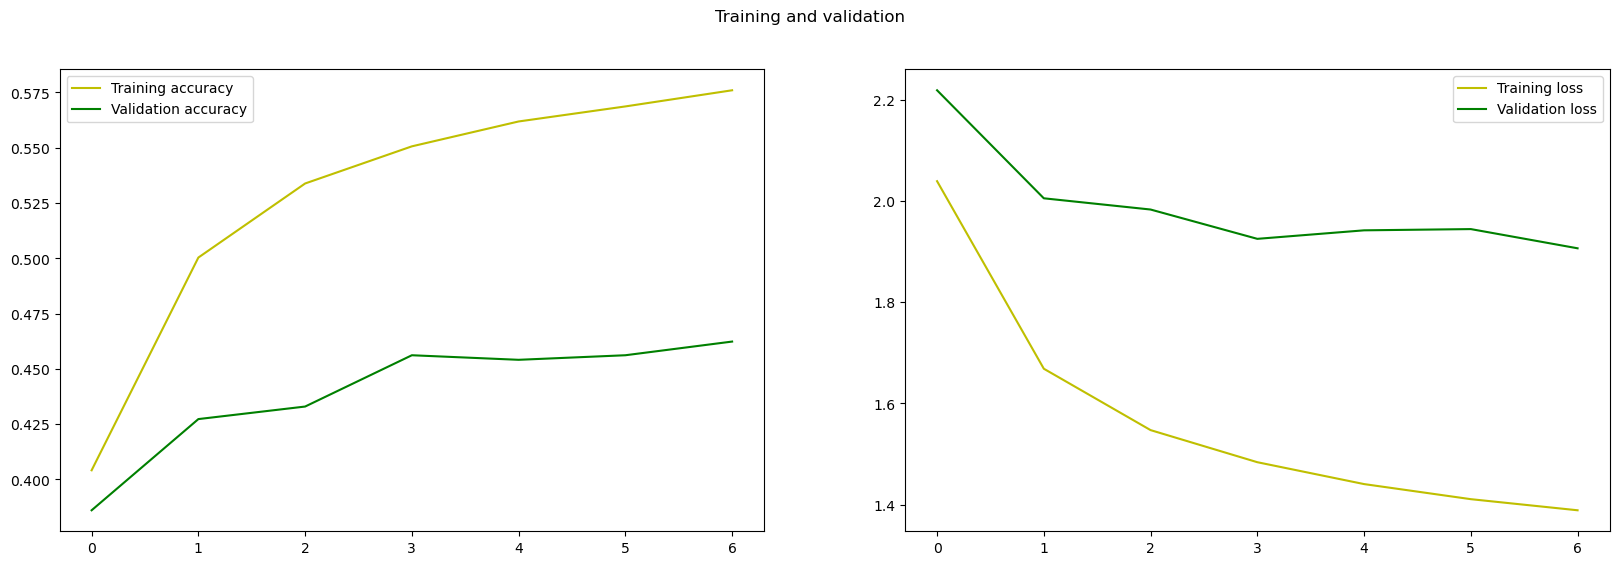

In [26]:
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']
epochs = range(len(acc))


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
ax[0].plot(epochs, acc, 'y', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'g', label='Validation accuracy')
ax[0].legend(loc=0)
ax[1].plot(epochs, loss, 'y', label='Training loss')
ax[1].plot(epochs, val_loss, 'g', label='Validation loss')
ax[1].legend(loc=0)

plt.suptitle('Training and validation')
plt.show()
     

In [27]:
def prepare_input(text):
    x = np.zeros((1, seq_len, len(character)))
    for t, char in enumerate(text):
        x[0, t, char_indices[char]] = 1.
        
    return x

prepare_input("This is an example of input of our model".lower())

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [28]:
def sample(preds, top_n=3):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    
    return heapq.nlargest(top_n, range(len(preds)), preds.take)
     

In [29]:
def predict_completion(text):
    original_text = text
    generated = text
    completion = ''
    while True:
        x = prepare_input(text)
        preds = model.predict(x, verbose=0)[0]
        next_index = sample(preds, top_n=1)[0]
        next_char = indices_char[next_index]
        text = text[1:] + next_char
        completion += next_char
        
        if len(original_text + completion) + 2 > len(original_text) and next_char == ' ':
            return completion

In [30]:
def predict_completions(text, n=3):
    x = prepare_input(text)
    preds = model.predict(x, verbose=0)[0]
    next_indices = sample(preds, n)
    return [indices_char[idx] + predict_completion(text[1:] + indices_char[idx]) for idx in next_indices]

In [31]:
quotes = [   
    "Deep learning is a branch of machine learning which is based on artificial neural networks.",
    "It is capable of learning complex patterns and relationships within data.",
    "In deep learning, we don’t need to explicitly program everything. It has become increasingly popular in recent years due to the advances in processing power and the availability of large datasets.",
    "Because it is based on artificial neural networks (ANNs) also known as deep neural networks (DNNs).",
    "These neural networks are inspired by the structure and function of the human brain’s biological neurons, and they are designed to learn from large amounts of data."  
    
]

In [32]:
for q in quotes:
    seq = q[:40].lower()
    print(seq)
    print(predict_completions(seq, 5))
    print()

deep learning is a branch of machine lea
['d ', 'st ', 'gue ', 've ', 'ther. ']

it is capable of learning complex patter
['ed ', ' of ', 's ', '. ', ', ']

in deep learning, we don’t need to expli
['teent ', 've ', 'se ', 'ned ', 'ent ']

because it is based on artificial neural
[' at ', 'ing ', 'ly ', 'y ', '. ']

these neural networks are inspired by th
['e ', 'is ', 'at ', 'ree ', 'ose ']

